In [4]:
import pandas as pd

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
100,2014,BMW,535d xDRIVE,MID-SIZE,3.0,6,A8,D,9.2,6.4,7.9,36,213
393,2014,FORD,FIESTA,SUBCOMPACT,1.6,4,M5,X,8.6,6.4,7.6,37,175
373,2014,FORD,F150 4X4,PICKUP TRUCK - STANDARD,3.5,6,AS6,X,15.4,11.0,13.4,21,308
1019,2014,VOLKSWAGEN,BEETLE,COMPACT,2.5,5,M5,X,11.2,7.7,9.6,29,221
309,2014,DODGE,CHARGER FFV,FULL-SIZE,3.6,6,A5,X,13.2,8.7,11.2,25,258


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
cdf = df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
56,3.0,6,12.4,285
594,2.4,4,9.4,216
912,5.7,8,14.1,324
798,1.6,4,8.3,191
405,2.0,4,8.0,184
503,1.6,4,7.7,177
143,1.4,4,9.2,212
131,4.4,8,13.9,320
878,3.8,6,10.8,248
583,2.4,4,11.1,255


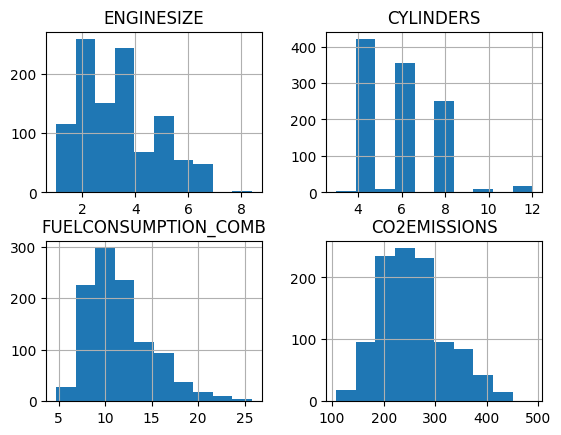

In [10]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
import matplotlib.pyplot as plt
viz.hist()
plt.show()

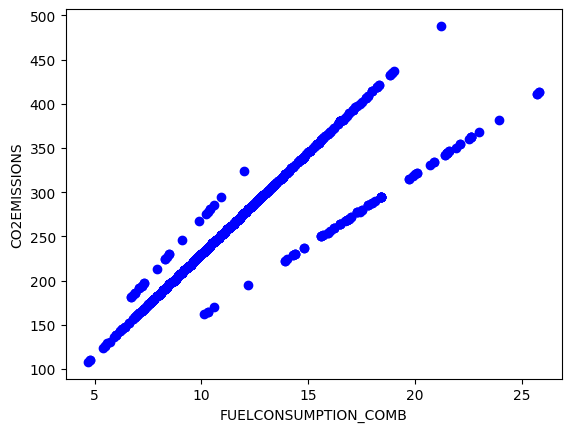

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

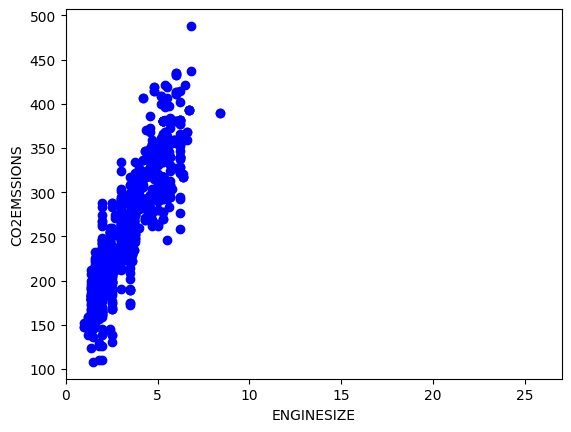

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlim(0,27)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMSSIONS')
plt.show()

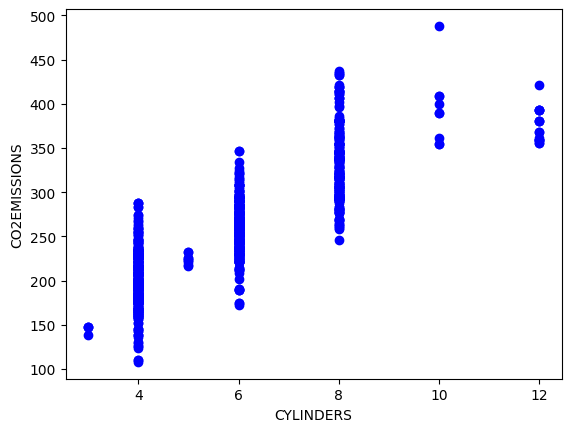

In [18]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [22]:
X = cdf['ENGINESIZE'].to_numpy()
y = cdf['CO2EMISSIONS'].to_numpy()


(1067,)

In [23]:
from sklearn.model_selection import train_test_split
train_X ,test_X, train_y , test_y = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(train_X.reshape(-1,1), train_y)

print(f"Coefficients: {regressor.coef_[0]}")
print(f"Intercept : {regressor.intercept_}")

Coefficients: 39.14645035597628
Intercept : 125.19445785505371


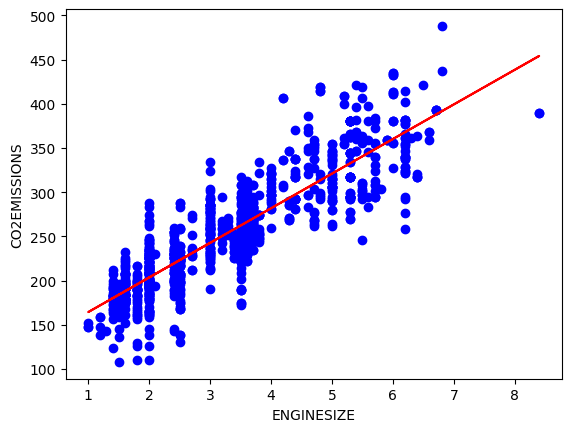

In [25]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.plot(train_X, regressor.coef_[0] * train_X + regressor.intercept_, '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_test = regressor.predict(test_X.reshape(-1,1))
print(f"MEAN SQUARED ERROR: {mean_squared_error(y_test, test_y)}")
print(f"R2 ERROR: {r2_score(y_test, test_y)}")

MEAN SQUARED ERROR: 931.2132172977814
R2 ERROR: 0.6952303917474212


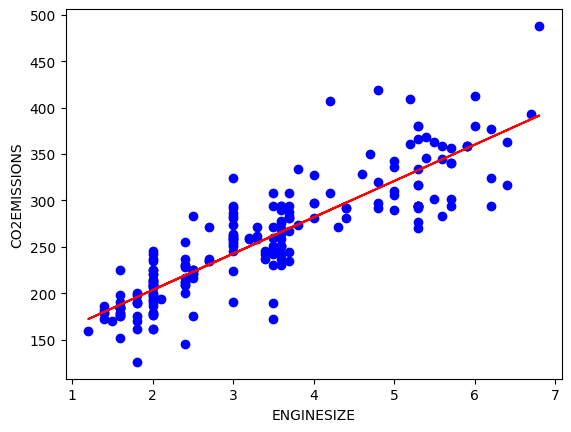

In [32]:
plt.scatter(test_X, test_y, color='blue')
plt.plot(test_X, regressor.coef_[0] * test_X + regressor.intercept_, '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [33]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [39]:
X2 = cdf['FUELCONSUMPTION_COMB'].to_numpy()
y2 = cdf['CO2EMISSIONS'].to_numpy()
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2,y2,test_size = 0.2, random_state=42)


regressor_2 = linear_model.LinearRegression()
regressor_2.fit(train_X2.reshape(-1,1), train_y2)

y2_hat = regressor_2.predict(test_X2.reshape(-1,1))
print(f"MEAN SQUARED ERROR: {mean_squared_error(y2_hat, test_y2)}")

MEAN SQUARED ERROR: 797.4346310097206
